In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Load sample data (replace with your actual data loading)
data = pd.read_csv("Dataset/1000doS_dataset.csv", header=None)
# Assign column names
data.columns = ['Timestamp', 'CAN_ID', 'DLC', 'DATA0', 'DATA1',
                'DATA2', 'DATA3', 'DATA4', 'DATA5', 'DATA6', 'DATA7', 'Flag']

# Convert Flag column to numerical labels using label encoding
label_encoder = LabelEncoder()
data['Flag'] = label_encoder.fit_transform(data['Flag'])

# Check if 'Timestamp' column is already in datetime format
# if not pd.api.types.is_datetime64_any_dtype(data['Timestamp']):
#     # Convert Timestamp to datetime with milliseconds unit
#     data["Timestamp"] = pd.to_datetime(data["Timestamp"], unit="ms")

data["Timestamp"] = pd.to_datetime(data["Timestamp"])

# Convert CAN ID and DLC to integer
data["CAN_ID"] = data["CAN_ID"].apply(lambda x: int(x, 16) if isinstance(x, str) else x)
data["DLC"] = data["DLC"].astype(int)





In [15]:

# Convert DATA fields from hexadecimal strings to integers
def hex_to_int(x):
    if isinstance(x, str):
        try:
            return int(x, 16)
        except ValueError:
            return np.nan
    else:
        return x


# Convert DATA fields from hexadecimal strings to integers
for i in range(8):
    data[f"DATA{i}"] = data[f"DATA{i}"].apply(hex_to_int).astype(float)


# print(data['DATA2'].unique())  # Print unique values in DATA2 column
#data.head(10)

# Assuming 'Flag' column represents the target variable
X = data.drop('Flag', axis=1)  # Features
y = data['Flag']  # Target variable

In [16]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop 'Timestamp' column from input features
X_train = X_train.drop('Timestamp', axis=1)
X_test = X_test.drop('Timestamp', axis=1)

# Impute missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize MLP Classifier
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500)  # Example parameters

# Train the classifier
mlp_classifier.fit(X_train_imputed, y_train)

# Predict on the test set
y_pred = mlp_classifier.predict(X_test_imputed)




Precision: 1.0
Recall: 1.0
F2 Score: 1.0


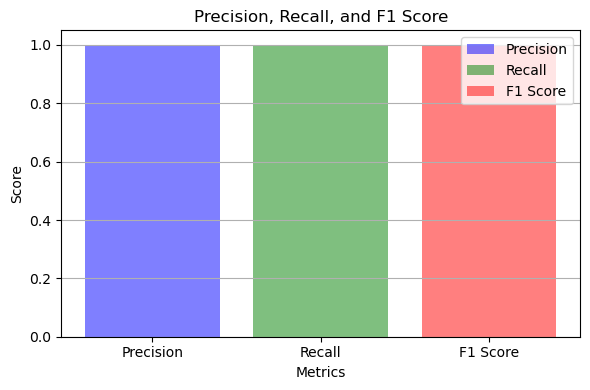

In [17]:
# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')


classes = label_encoder.classes_  # Get class labels

# Convert class labels to strings
classes = [str(cls) for cls in classes]

print("Precision:", precision)
print("Recall:", recall)
print("F2 Score:", f1_score)

plt.figure(figsize=(6, 4))

# Precision
plt.bar(['Precision'], [precision], color='b', alpha=0.5, label='Precision')

# Recall
plt.bar(['Recall'], [recall], color='g', alpha=0.5, label='Recall')

# F1 Score
plt.bar(['F1 Score'], [f1_score], color='r', alpha=0.5, label='F1 Score')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Precision, Recall, and F1 Score')
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()